In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt

from scipy.stats import skew, zscore

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
df1 = pd.read_csv(r"C:\Users\Usuario\Downloads\INFO VISUALISATION\celeba_buffalo_l.csv")
df1.head(5)

,image_name,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,...,embedding_488,embedding_489,embedding_490,embedding_491,embedding_492,embedding_493,embedding_494,embedding_495,embedding_496,embedding_497,embedding_498,embedding_499,embedding_500,embedding_501,embedding_502,embedding_503,embedding_504,embedding_505,embedding_506,embedding_507,embedding_508,embedding_509,embedding_510,embedding_511,id
0,000001.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,...,-0.080292,-0.732026,-0.175278,0.171214,-1.087177,0.499718,-0.197307,-0.586855,0.781659,-1.147502,-0.183096,0.279045,0.824048,-1.154524,0.657348,-1.484989,-0.136410,-1.090225,-1.596338,-0.110376,0.900254,0.341207,0.462908,-0.673743,2880
1,000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-0.798642,0.165070,-0.730298,1.487412,0.754034,-0.408146,-0.468770,-0.404783,1.077668,0.738265,0.284652,-0.138282,-1.978817,-0.618128,0.935361,-0.510537,1.625798,0.871837,2.200004,0.998827,-0.397962,0.390829,0.194029,0.992391,5805
2,000006.jpg,-1,1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,1,...,-0.293866,0.549312,0.229529,1.373523,0.702331,-1.722346,-0.280896,-2.265324,1.424164,0.596643,-1.285127,0.284748,-1.494485,0.315723,-1.637391,-0.645637,0.012643,-0.320423,-0.697942,-1.986939,1.115830,-1.022141,0.347849,-0.710683,4153
3,000008.jpg,1,1,1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,...,1.592171,0.166263,0.422682,0.152181,-0.498383,-1.662725,0.618174,0.250817,0.090795,0.572683,-1.130093,-0.265538,1.233090,-0.026752,0.939887,0.983840,1.101034,0.255945,-0.935750,-1.363179,-0.894348,-0.651322,0.674887,-1.069576,6369
4,000018.jpg,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,1,...,-0.879276,0.084894,-1.141586,-0.127453,-0.703938,0.038576,1.336055,1.250469,-1.340653,1.944479,-0.620211,0.426687,-1.489578,-0.442803,0.562390,-0.168269,0.474727,1.060535,-0.073372,-0.600600,0.203963,0.013085,0.170634,-0.035556,2464


In [4]:
df1.shape

(30012, 553)

In [5]:
df1.dtypes.value_counts()

float64    512
int64       40
object       1
dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30012 entries, 0 to 30011
Columns: 553 entries, image_name to id
dtypes: float64(512), int64(40), object(1)
memory usage: 126.6+ MB


In [7]:
df1.loc[df1.isna().any(axis=1)]


,image_name,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,...,embedding_488,embedding_489,embedding_490,embedding_491,embedding_492,embedding_493,embedding_494,embedding_495,embedding_496,embedding_497,embedding_498,embedding_499,embedding_500,embedding_501,embedding_502,embedding_503,embedding_504,embedding_505,embedding_506,embedding_507,embedding_508,embedding_509,embedding_510,embedding_511,id


In [8]:
df2 = pd.read_csv(r"C:\Users\Usuario\Downloads\INFO VISUALISATION\celeba_buffalo_s.csv")
df2.head()

,image_name,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,...,embedding_488,embedding_489,embedding_490,embedding_491,embedding_492,embedding_493,embedding_494,embedding_495,embedding_496,embedding_497,embedding_498,embedding_499,embedding_500,embedding_501,embedding_502,embedding_503,embedding_504,embedding_505,embedding_506,embedding_507,embedding_508,embedding_509,embedding_510,embedding_511,id
0,000001.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,...,-0.696074,-1.020557,1.200183,-0.111039,1.595438,-1.632504,0.191714,0.323044,-2.054769,-1.322355,-0.196904,-0.778327,-0.919247,-0.203325,-0.023952,1.386229,1.038198,0.203400,0.152553,-1.347952,0.525928,-0.857195,-0.624359,0.574275,2880
1,000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1.209094,1.049657,-0.899133,-0.338053,0.932248,-1.552155,1.791231,0.544532,-0.330701,-0.167529,0.734353,1.418524,-0.152465,-0.061196,0.260606,1.489825,-0.734394,-0.407281,0.822241,-0.412348,0.441994,0.071413,0.644596,-0.102929,5805
2,000006.jpg,-1,1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,1,...,-1.123917,-0.398579,1.058913,-1.130438,-1.716764,-0.237284,0.157904,0.006060,0.931404,0.606520,-2.702054,-0.548417,-0.826437,-1.704484,-0.381546,-0.293804,0.464465,-0.786862,-0.055037,0.191128,0.354288,-1.069309,-0.270704,-1.608960,4153
3,000008.jpg,1,1,1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,...,-0.313921,-0.437333,-0.351423,-0.602644,1.353177,-0.215119,-0.381469,-0.079622,-0.627032,-0.652298,-0.032851,-0.248949,0.126721,0.434505,0.624974,0.053876,-2.210749,-0.016998,-1.511237,0.768989,1.729786,-0.595846,0.707644,-0.234487,6369
4,000018.jpg,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,1,...,-1.805863,-0.458248,-1.198148,-0.300404,-0.840652,0.660510,2.165788,0.308929,0.904349,0.950036,1.202098,-0.897074,0.107450,-0.033218,0.341663,1.088580,-0.577434,0.668719,1.479633,-1.114480,-0.418312,-0.802752,-0.038157,0.417186,2464


In [9]:
df2.shape

(30021, 553)

In [10]:
df2.dtypes.value_counts()

float64    512
int64       40
object       1
dtype: int64

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Columns: 553 entries, image_name to id
dtypes: float64(512), int64(40), object(1)
memory usage: 126.7+ MB


In [12]:
df2.loc[df2.isna().any(axis=1)]

,image_name,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,...,embedding_488,embedding_489,embedding_490,embedding_491,embedding_492,embedding_493,embedding_494,embedding_495,embedding_496,embedding_497,embedding_498,embedding_499,embedding_500,embedding_501,embedding_502,embedding_503,embedding_504,embedding_505,embedding_506,embedding_507,embedding_508,embedding_509,embedding_510,embedding_511,id


In [13]:
def subset(df):
	mask = df.columns[~df.columns.str.startswith("emb")]
	subset = df[mask]
	subset = subset.drop(columns = ["image_name", "id"])
	return subset

subset1 = subset(df1)
subset1.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
2,-1,1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1
3,1,1,1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,1,-1,-1,1,-1,1,-1,1,-1,1,1,-1,1,1,-1,-1


In [14]:
subset2 = subset(df2)
subset2.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
2,-1,1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1
3,1,1,1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,1,-1,-1,1,-1,1,-1,1,-1,1,1,-1,1,1,-1,-1


In [15]:
subset1.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Bags_Under_Eyes', 'Bald',
       'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry',
       'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses',
       'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male',
       'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [16]:
subset2.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Bags_Under_Eyes', 'Bald',
       'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry',
       'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses',
       'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male',
       'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

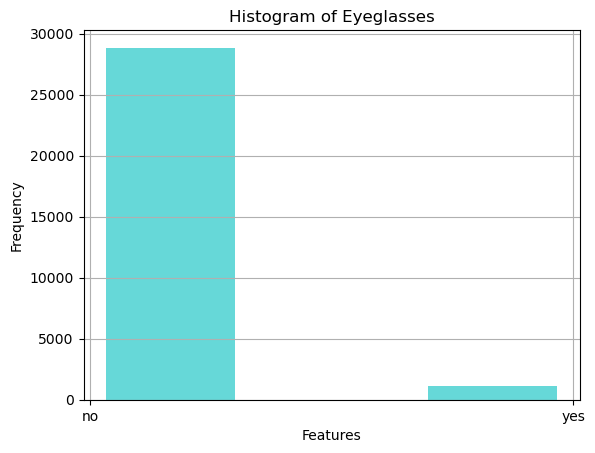

In [17]:
FEATURE = "Eyeglasses"

def histogram_of_feature(df, feature: str):
	ax = df[feature].replace({-1: "no", 1: "yes"}).hist(bins=3, rwidth=0.8, alpha=0.6, color="c")
	
	ax.set_xlabel("Features")
	ax.set_ylabel("Frequency")
	ax.set_title(f"Histogram of {FEATURE}")

histogram_of_feature(subset1, FEATURE)

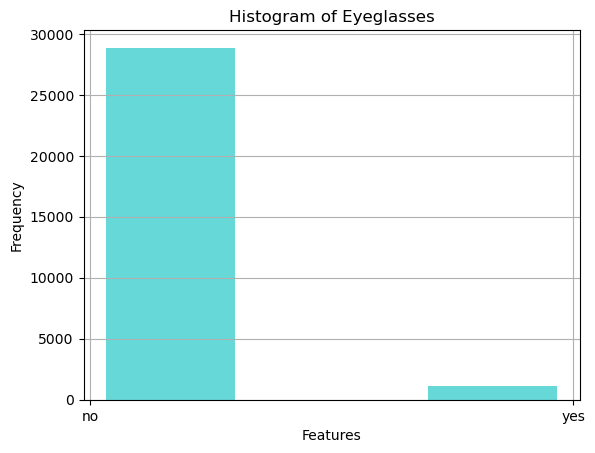

In [18]:
histogram_of_feature(subset2, FEATURE)

In [19]:
def feature_presence_counter(df):
	#df[feature].replace({-1: "no", 1: "yes"}).unique()
	counts = pd.DataFrame({col: df[col].value_counts() for col in df})
	counts = counts.iloc[1]
	counts = counts.sort_values(ascending=False)
	return counts

feature_presence_counter(subset1)

No_Beard               25407
Young                  24332
Wearing_Lipstick       17287
Mouth_Slightly_Open    14205
Smiling                13929
Heavy_Makeup           13587
High_Cheekbones        13522
Arched_Eyebrows        12592
Wavy_Hair              11205
Pointy_Nose            10339
Male                   10004
Big_Lips                8697
Big_Nose                8555
Bags_Under_Eyes         8403
Wearing_Earrings        7030
Black_Hair              6365
Straight_Hair           6203
Wearing_Necklace        5855
Brown_Hair              5573
Bangs                   5460
Blond_Hair              5401
Bushy_Eyebrows          4408
Oval_Face               3959
5_o_Clock_Shadow        3760
Rosy_Cheeks             3110
Narrow_Eyes             2580
Receding_Hairline       2057
Goatee                  2053
Sideburns               1941
Wearing_Necktie         1914
Mustache                1601
Pale_Skin               1576
Blurry                  1375
Eyeglasses              1160
Chubby        

In [20]:
feature_presence_counter(subset2, FEATURE)

TypeError: feature_presence_counter() takes 1 positional argument but 2 were given

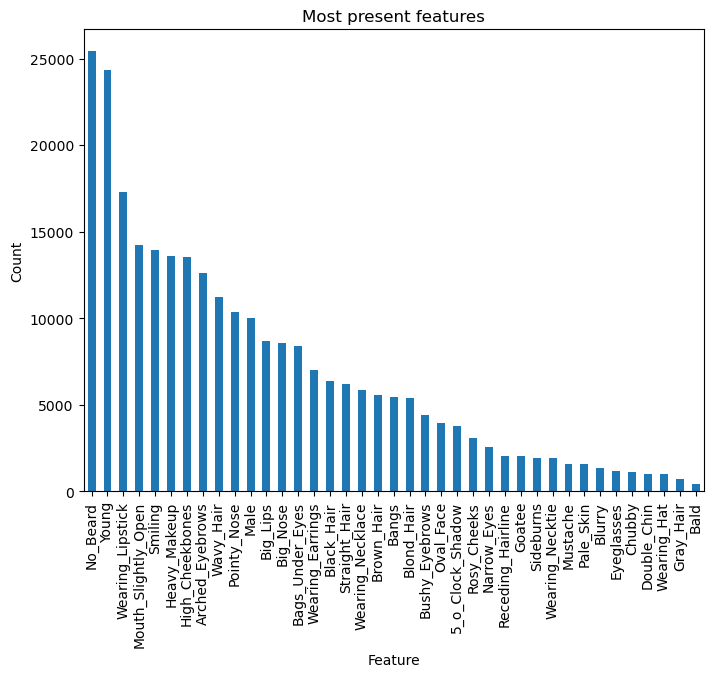

In [21]:
def feature_presence_couter_plot(df):
	counts = pd.DataFrame({col: df[col].value_counts() for col in df})
	counts = counts.iloc[1]
	counts = counts.sort_values(ascending=False)

	fig, ax = plt.subplots(figsize=(8, 6))
	counts.plot(kind="bar", ax=ax)

	ax.set_title("Most present features")
	ax.set_xlabel("Feature")
	ax.set_ylabel("Count")

feature_presence_couter_plot(subset1)

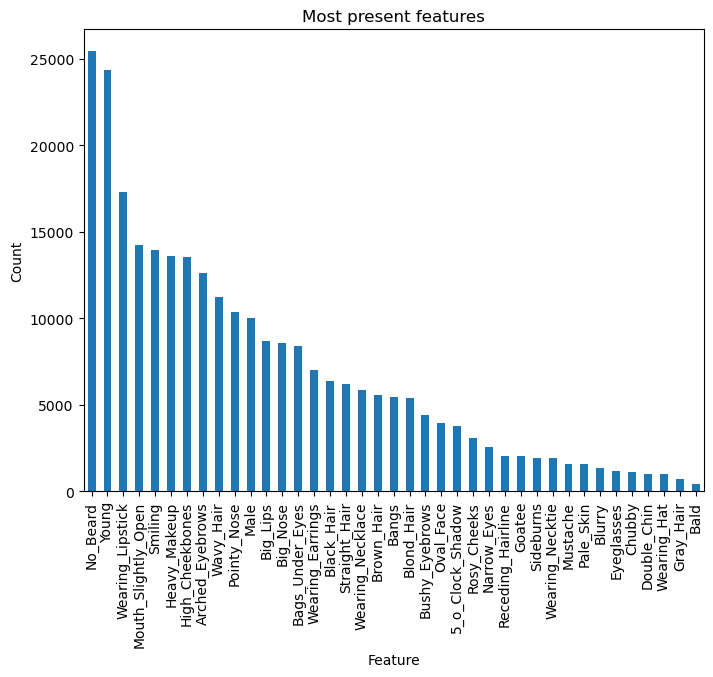

In [22]:
feature_presence_couter_plot(subset2)

In [23]:
def correlation_between_feature(df):
	fig = plt.subplots(figsize=(12, 10))
	corr = df.corr().abs()

	mask = np.triu(np.ones_like(corr, dtype=bool))
	sns.heatmap(corr, mask=mask, cmap="magma", square=True, vmin=0, vmax=1, center=0, annot=False)

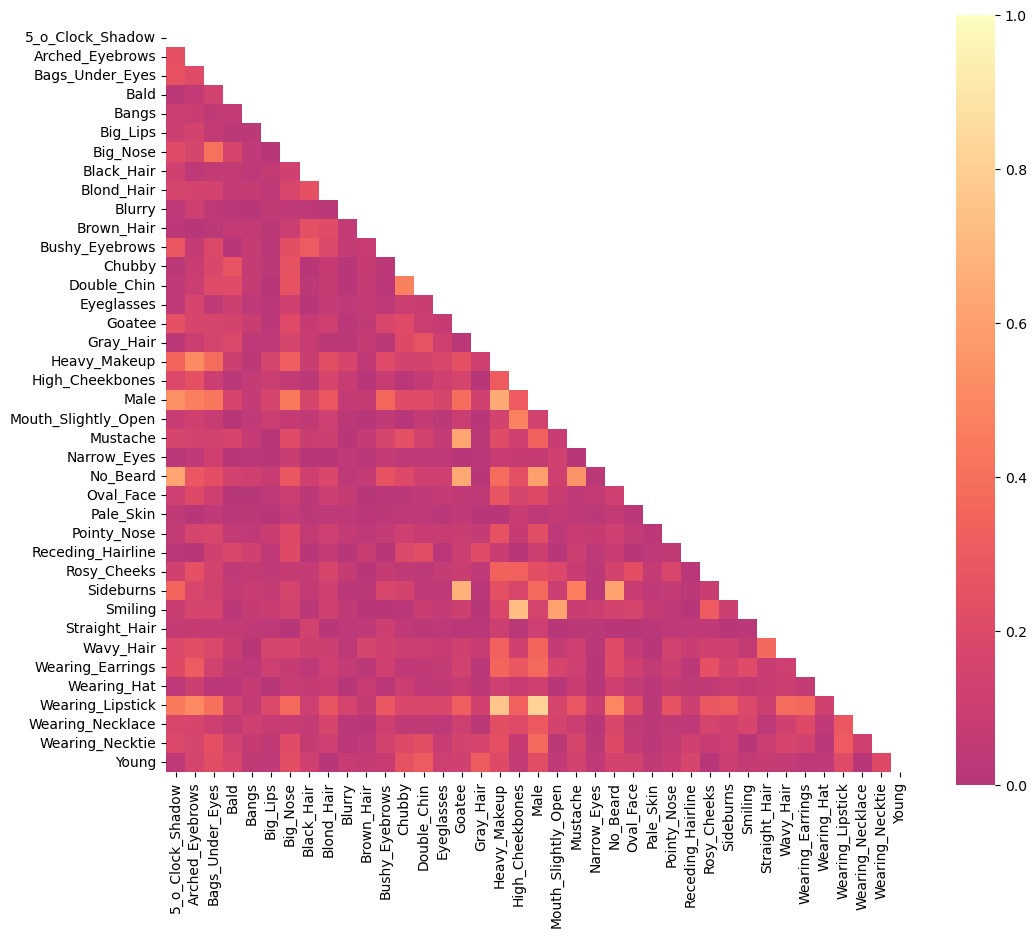

In [24]:
correlation_between_feature(subset1)

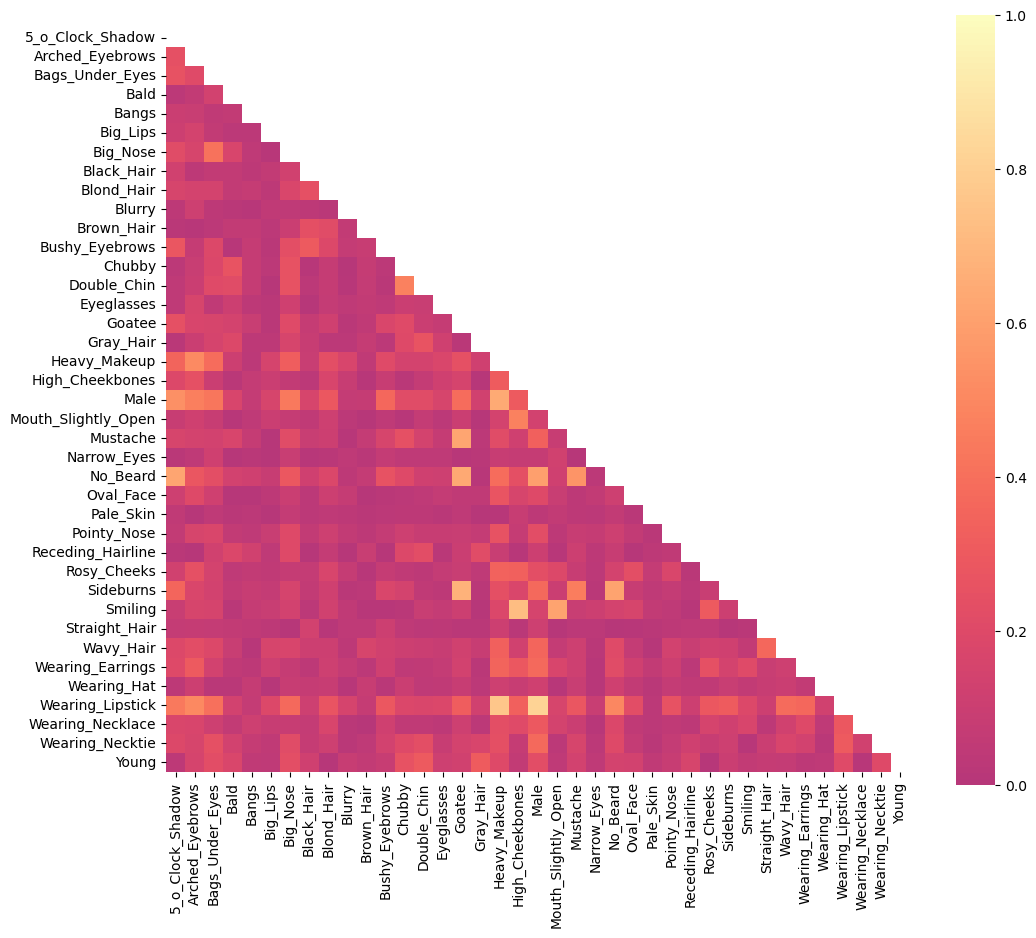

In [25]:
correlation_between_feature(subset2)

<AxesSubplot:xlabel='No_Beard', ylabel='embedding_0'>

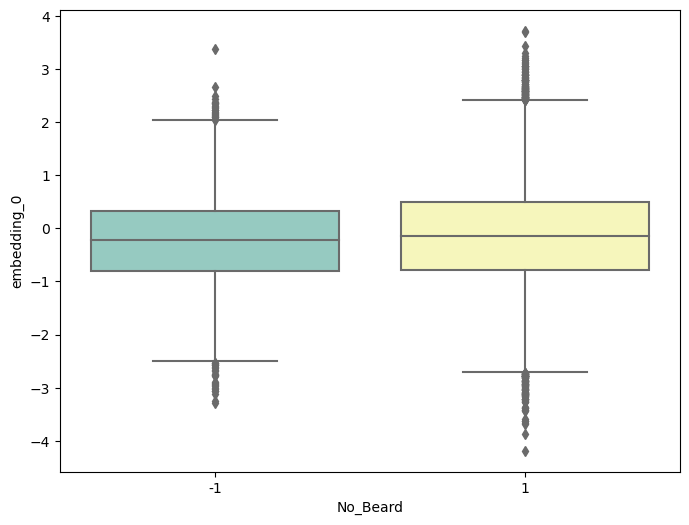

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="No_Beard", y="embedding_0", data=df1, palette="Set3")

<AxesSubplot:xlabel='No_Beard', ylabel='embedding_0'>

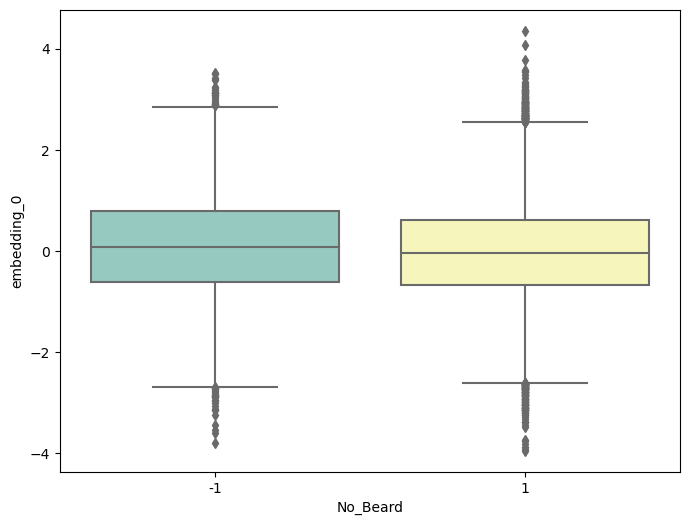

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="No_Beard", y="embedding_0", data=df2, palette="Set3")

In [28]:
def subset_emb_columns(df):
    mask = df.columns[df.columns.str.startswith("emb")]
    subset = df[mask]
    return subset

# Example usage
subset_with_emb_columns = subset_emb_columns(df1)
subset_with_emb_columns.head()

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,embedding_11,embedding_12,embedding_13,embedding_14,embedding_15,embedding_16,embedding_17,embedding_18,embedding_19,embedding_20,embedding_21,embedding_22,embedding_23,embedding_24,...,embedding_487,embedding_488,embedding_489,embedding_490,embedding_491,embedding_492,embedding_493,embedding_494,embedding_495,embedding_496,embedding_497,embedding_498,embedding_499,embedding_500,embedding_501,embedding_502,embedding_503,embedding_504,embedding_505,embedding_506,embedding_507,embedding_508,embedding_509,embedding_510,embedding_511
0,1.441545,2.393396,-1.003623,0.122308,1.842565,-1.090654,0.968768,-0.160028,-1.140183,-0.803360,-0.082562,1.210779,-0.999959,-0.457583,-2.739251,-0.617831,-1.434454,-0.892079,-0.040088,0.931487,-0.028464,1.180396,-0.945818,-0.020908,-1.617813,...,-0.213130,-0.080292,-0.732026,-0.175278,0.171214,-1.087177,0.499718,-0.197307,-0.586855,0.781659,-1.147502,-0.183096,0.279045,0.824048,-1.154524,0.657348,-1.484989,-0.136410,-1.090225,-1.596338,-0.110376,0.900254,0.341207,0.462908,-0.673743
1,-0.513956,-0.054110,-0.041697,1.244457,-0.930742,0.030254,0.491898,1.462660,-0.067617,0.403593,-0.072454,1.444416,-1.334165,-0.377216,0.198586,0.009217,-0.688447,-0.862486,0.006950,0.691100,0.998258,2.982424,-0.255688,-1.246722,-0.158091,...,-0.040382,-0.798642,0.165070,-0.730298,1.487412,0.754034,-0.408146,-0.468770,-0.404783,1.077668,0.738265,0.284652,-0.138282,-1.978817,-0.618128,0.935361,-0.510537,1.625798,0.871837,2.200004,0.998827,-0.397962,0.390829,0.194029,0.992391
2,1.075346,0.380185,0.436007,-0.507009,-0.696099,1.786359,-1.040563,-0.498421,-0.720458,-0.333438,1.145739,1.093459,0.722417,-0.703625,0.751143,-0.010654,0.181439,0.455150,0.152289,0.240043,-0.874780,2.207629,-1.296124,0.080973,2.307815,...,-1.671123,-0.293866,0.549312,0.229529,1.373523,0.702331,-1.722346,-0.280896,-2.265324,1.424164,0.596643,-1.285127,0.284748,-1.494485,0.315723,-1.637391,-0.645637,0.012643,-0.320423,-0.697942,-1.986939,1.115830,-1.022141,0.347849,-0.710683
3,-1.108241,1.665860,0.904464,-1.106271,-1.015055,0.256345,-0.403926,-0.500956,1.580117,-0.811156,0.081608,1.058850,0.572398,-0.232339,-0.523159,-2.148407,-1.126570,0.811566,-0.979871,0.969066,0.289832,0.001918,-1.195338,-0.587675,0.808792,...,-0.732109,1.592171,0.166263,0.422682,0.152181,-0.498383,-1.662725,0.618174,0.250817,0.090795,0.572683,-1.130093,-0.265538,1.233090,-0.026752,0.939887,0.983840,1.101034,0.255945,-0.935750,-1.363179,-0.894348,-0.651322,0.674887,-1.069576
4,0.472541,1.206789,0.675895,0.052689,0.906199,0.981983,1.308634,1.814266,0.228123,-0.133187,-1.021208,-0.618205,-0.346592,-0.934229,0.692586,-0.562647,-0.748820,-0.085532,-0.460056,0.136482,0.199034,1.631239,-1.872556,0.414579,-0.129473,...,-0.243605,-0.879276,0.084894,-1.141586,-0.127453,-0.703938,0.038576,1.336055,1.250469,-1.340653,1.944479,-0.620211,0.426687,-1.489578,-0.442803,0.562390,-0.168269,0.474727,1.060535,-0.073372,-0.600600,0.203963,0.013085,0.170634,-0.035556


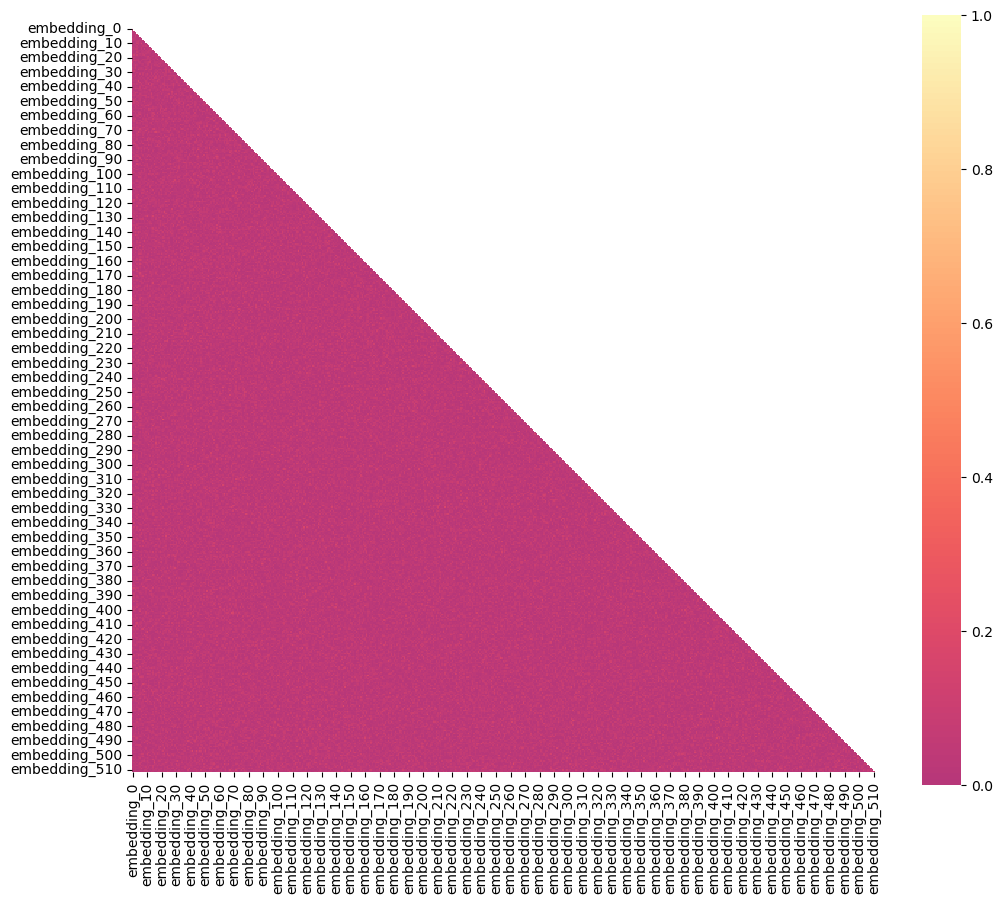

In [29]:
correlation_between_feature(subset_with_emb_columns)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


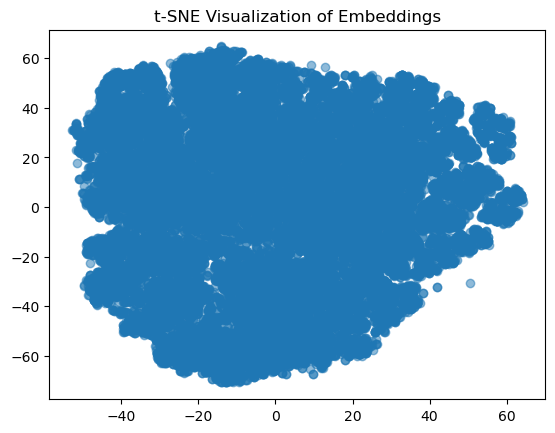

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'embeddings' is your 2D NumPy array with shape (samples, embedding_dimension)
tsne = TSNE(n_components=2, perplexity = 50, random_state=42)
embeddings_2d = tsne.fit_transform(subset1)

# Scatter plot for visualization
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)
plt.title('t-SNE Visualization of Embeddings')
plt.show()

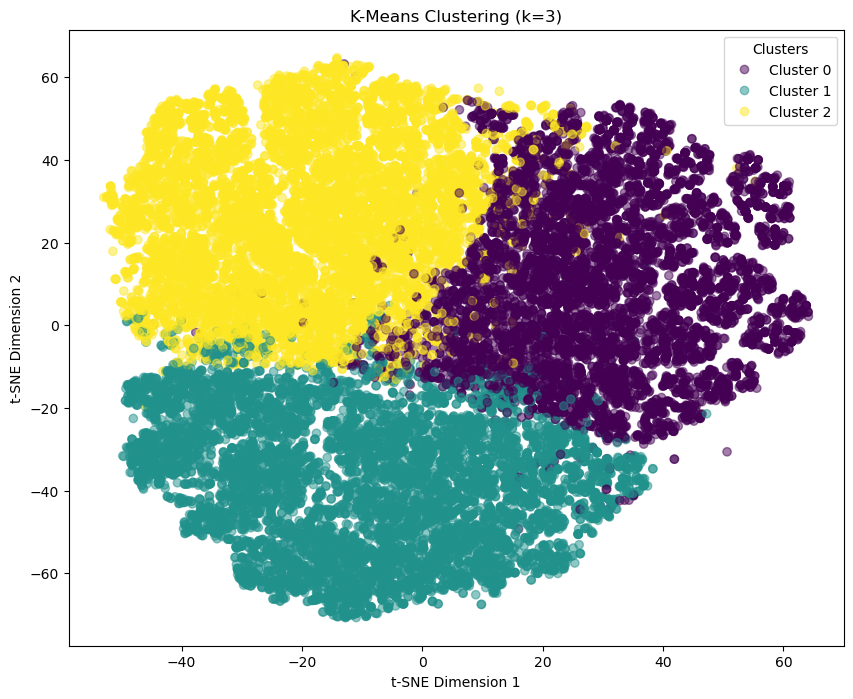

In [46]:
from sklearn.cluster import KMeans
k = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(subset1)

# Visualize the clusters in 2D
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title(f'K-Means Clustering (k={k})')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Add a legend
legend_labels = [f'Cluster {i}' for i in range(k)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')

plt.show()

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


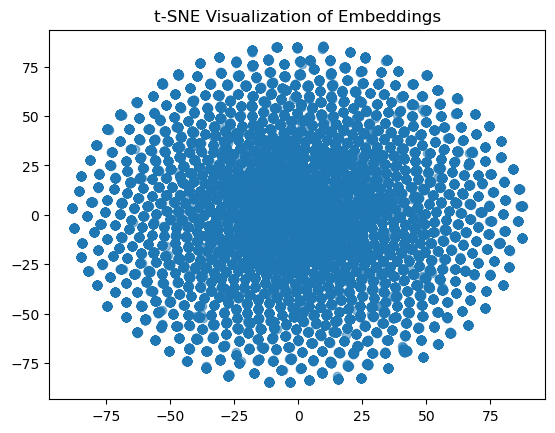

In [47]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'embeddings' is your 2D NumPy array with shape (samples, embedding_dimension)
tsne = TSNE(n_components=2, perplexity = 50, random_state=42)
embeddings_2d = tsne.fit_transform(subset_with_emb_columns)

# Scatter plot for visualization
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)
plt.title('t-SNE Visualization of Embeddings')
plt.show()

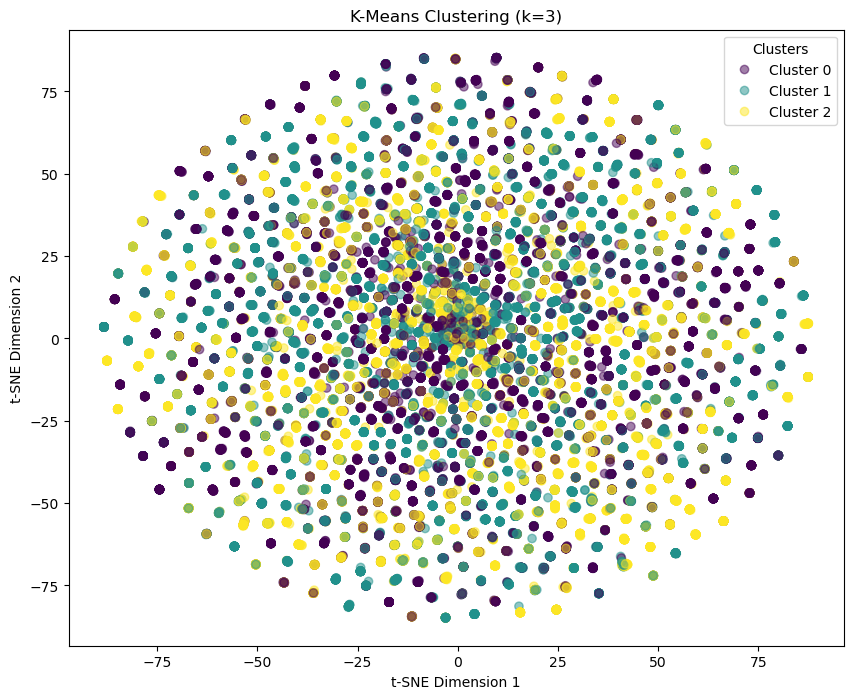

In [49]:
from sklearn.cluster import KMeans
k = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(subset_with_emb_columns)

# Visualize the clusters in 2D
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title(f'K-Means Clustering (k={k})')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Add a legend
legend_labels = [f'Cluster {i}' for i in range(k)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')

plt.show()